In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pandas==2.2.1
!pip install bertopic
!pip install \
    --extra-index-url=https://pypi.nvidia.com \
    cudf-cu12==24.4.* dask-cudf-cu12==24.4.* cuml-cu12==24.4.* \
    cugraph-cu12==24.4.* cuspatial-cu12==24.4.* cuproj-cu12==24.4.* \
    cuxfilter-cu12==24.4.* cucim-cu12==24.4.* pylibraft-cu12==24.4.* \
    raft-dask-cu12==24.4.* cuvs-cu12==24.4.*

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 77.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 9.3 MB/s eta 0:00:00
  Using cached n

In [3]:
import numpy as np
from zipfile import ZipFile
import pandas as pd

with ZipFile("/content/drive/MyDrive/processed data/past five years/future_2019_2023.csv.zip", "r") as unzipped_file:
  with unzipped_file.open("future_2019_2023.csv") as csv_file:
    future_2019_2023 = pd.read_csv(csv_file)

In [4]:
future_2019_2023['datetime'] = pd.to_datetime(future_2019_2023['date'])
future_2019_2023['year'] = future_2019_2023['datetime'].dt.year
headlines_chunk = [group_df.headline.tolist() for _, group_df in future_2019_2023.groupby('year')]
headlines_chunk
length = len(headlines_chunk)

In [5]:
future_2023 = future_2019_2023[future_2019_2023['year'] == 2023]
future_2023 = future_2023.drop(columns = ["datetime", "year"])
future_2023 = future_2023.reset_index(drop=True)
future_2023


,date,rp_entity_id,comnam,headline,future_ret
0,2023-01-03,7A10FF,MONDELEZ INTERNATIONAL INC,Dave & Buster's Entertainment Inc. Stock Outpe...,-0.003759
1,2023-01-03,7A10FF,MONDELEZ INTERNATIONAL INC,Coca-Cola Co. Stock Outperforms Competitors De...,-0.003759
2,2023-01-03,7A10FF,MONDELEZ INTERNATIONAL INC,Heard on the Street: These Consumer Goods Are ...,-0.003759
3,2023-01-03,7A10FF,MONDELEZ INTERNATIONAL INC,EXCHANGE --- Heard on the Street: These Con...,-0.003759
4,2023-01-03,7A10FF,MONDELEZ INTERNATIONAL INC,Mondelez Cut to Sector Perform From Outperform...,-0.003759
...,...,...,...,...,...
1549132,2023-12-29,D21EF3,GARMIN LTD,Garmin Ltd. Stock Underperforms Thursday When ...,0.001090
1549133,2023-12-29,C44D01,ENPHASE ENERGY INC,S&P 500's Biggest Losers in 2023: Dollar Gener...,-0.019660
1549134,2023-12-29,C44D01,ENPHASE ENERGY INC,"Rate-Cut Hopes, AI, No Recession This Year. Wh...",-0.015497
1549135,2023-12-29,D0909F,HESS CORP,Why Europe's Oil Majors Beat Exxon and Chevron...,-0.010434


In [6]:
import pandas as pd
print("Pandas version:", pd.__version__)

Pandas version: 2.2.1


In [7]:
# from sentence_transformers import SentenceTransformer
# # Pre-calculate embeddings
# embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
# embeddings = embedding_model.encode(future_2023.headline.tolist(), show_progress_bar=True)
# np.save('future_2023_embeddings.npy', embeddings)

In [8]:
from sentence_transformers import SentenceTransformer
# Pre-calculate embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = np.load('/content/drive/MyDrive/processed data/future_2023_embeddings.npy')

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [9]:
from cuml.manifold import UMAP
from sklearn.decomposition import PCA
from cuml.cluster import HDBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

class ClusterModel:
    def __init__(self, model):
        self.model = model

    def fit(self, X, y=None):
        self.model.fit(X)
        self.labels_ = self.model.predict(X)
        return self

    def predict(self, X):
        predictions = self.model.predict(X)
        self.labels_ = predictions
        return predictions

In [10]:
#reduce the dimensionality of the embeddings
PCA_model = PCA(n_components=5)
dim_reduc_data = PCA_model.fit_transform(embeddings)

In [ ]:
#Choose the best cluster number for KMeans
wcss = []
silhouette_scores = []
k_values = range(40, 180, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(dim_reduc_data)
    wcss.append(kmeans.inertia_)

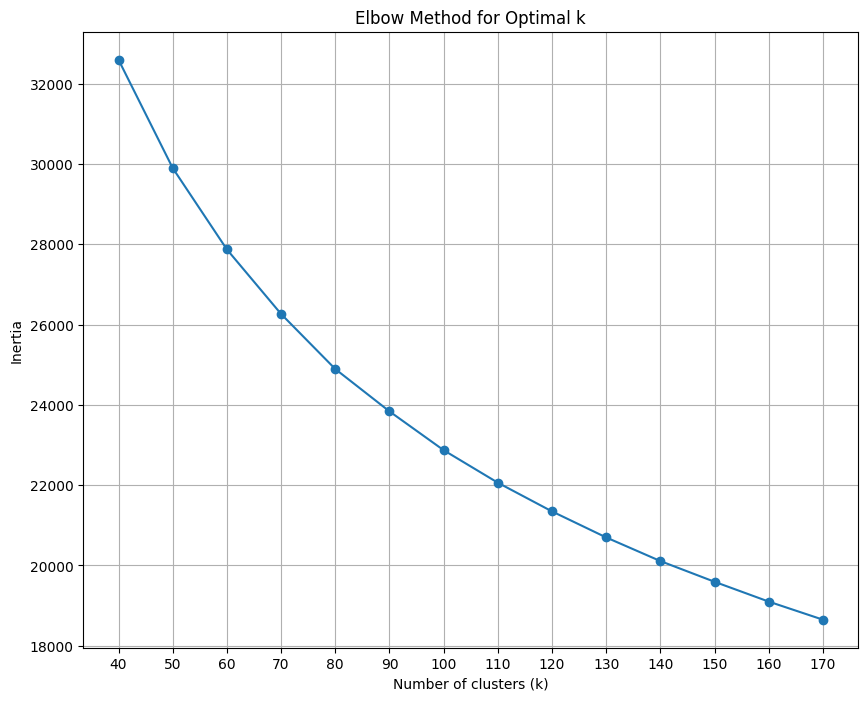

In [13]:
#Plot the inertia against k to visualize the elbow

plt.figure(figsize=(10, 8))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
# silhouette_scores of KMeans
# silhouette_scores = []
# k_values = range(40, 180, 10)

# for k in k_values:
#     cluster_labels = kmeans.predict(dim_reduc_data)
#     silhouette_avg = silhouette_score(dim_reduc_data, cluster_labels)
#     silhouette_scores.append(silhouette_avg)

# # #Plot the Silhouette Scores against k
# plt.figure(figsize=(10, 10))
# plt.plot(k_values, silhouette_scores, marker='o')
# plt.title('Silhouette Score Method for Optimal k')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Silhouette Score')
# plt.xticks(k_values)
# plt.grid(True)
# plt.show()

In [14]:
#Using AIC/BIC to choose the number of Cluster in GMM
models = [GaussianMixture(n_components=i, covariance_type='full', random_state = 42).fit(dim_reduc_data) for i in range(30, 150, 10)]
aic = [m.aic(dim_reduc_data) for m in models]
bic = [m.bic(dim_reduc_data) for m in models]


In [33]:
aic

[-10572235.807704536,
 -10612728.04740849,
 -10635075.943016263,
 -10658270.92408216,
 -10677667.986807948,
 -10728326.380711501,
 -10743627.302915482,
 -10757126.739450272,
 -10763942.812217962,
 -10769905.05900766,
 -10776863.273061657,
 -10778680.538086735]

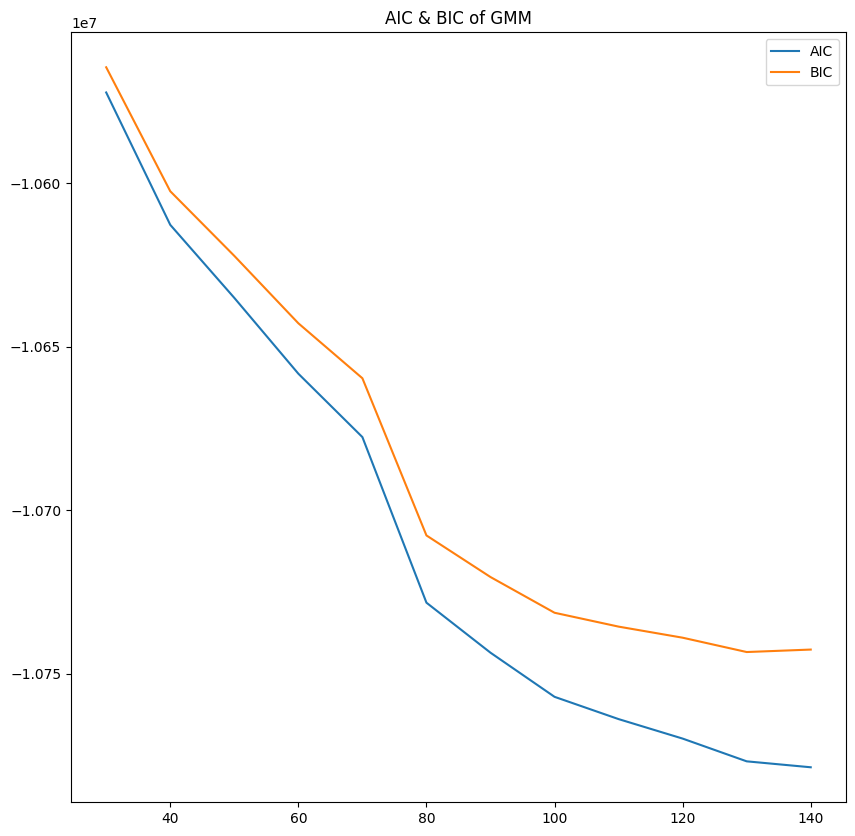

In [32]:
plt.figure(figsize = (10, 8))
plt.plot(range(30, 150, 10), aic, label="AIC")
plt.plot(range(30, 150, 10), bic, label="BIC")
plt.legend(loc="upper right")
plt.title("AIC & BIC of GMM")
plt.show()

In [36]:
# Reduce dimensionality
PCA_model = PCA(n_components=5)
umap_model = UMAP(n_neighbors=10, n_components=5, min_dist=0.0, metric='cosine', random_state=42)

# Cluster embeddings
gmm_model = ClusterModel(GaussianMixture(n_components=140, covariance_type='full', random_state = 42))
KMeans_model = KMeans(n_clusters=100)
hdbscan_model = HDBSCAN(min_cluster_size =1000,  metric='euclidean', cluster_selection_method='eom',\
                        gen_min_span_tree=True,prediction_data=False,min_samples = 50,verbose = True)
# Vectorize
vectorizer_model = CountVectorizer(stop_words="english", min_df=0.1, max_df = 0.9, ngram_range=(1, 2))

In [37]:
from bertopic import BERTopic

# Create BERTopic model
topic_model = BERTopic(

  # Pipeline models
  embedding_model=embedding_model,
  umap_model=PCA_model,
  hdbscan_model=gmm_model,
  vectorizer_model=vectorizer_model,
  #representation_model=representation_model,

  calculate_probabilities=False,
  low_memory = True,

  # Hyperparameters
  top_n_words=10,
  verbose=True,
  #min_topic_size = 300,
)

headlines = headlines_chunk[4]

# Train model
topics, probs = topic_model.fit_transform(headlines, embeddings)

# Show topics
topic_model.get_topic_info()

2024-06-14 09:30:45,350 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-06-14 09:30:55,058 - BERTopic - Dimensionality - Completed ✓
2024-06-14 09:30:55,091 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-06-14 09:44:45,151 - BERTopic - Cluster - Completed ✓
2024-06-14 09:44:45,409 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-06-14 09:45:17,619 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,0,22216,0_inst holders_inst_holders_com inst,"[inst holders, inst, holders, com inst, holder...","[OPGEN INC COM, Inst Holders, 3Q 2023 (OPGN),..."
1,1,21593,1_inst_inst holders_holders_holdings,"[inst, inst holders, holders, holdings, holder...","[FIRSTCASH HOLDINGS INC COM, Inst Holders, 3Q..."
2,2,21186,2_stock_underperforms_stock falls_falls,"[stock, underperforms, stock falls, falls, und...",[Morgan Stanley Stock Underperforms Friday Whe...
3,3,19019,3_inst holders_inst_holders_holders 2q,"[inst holders, inst, holders, holders 2q, 2q 2...","[BEYOND AIR INC COM, Inst Holders, 2Q 2023 (XA..."
4,4,18474,4_00_price target_00 share_target,"[00, price target, 00 share, target, price, sh...",[Mirvac Price Target Cut 9.8% to A$2.30/Share ...
...,...,...,...,...,...
135,135,5043,135_dividend_ex_admission_london stock,"[dividend, ex, admission, london stock, stock ...","[Stocks Ex-Dividend May 11, Stocks Ex-Dividend..."
136,136,4150,136_america merrill_merrill lynch_merrill_lynch,"[america merrill, merrill lynch, merrill, lync...",[Bank of America Merrill Lynch 20230224_HORIZO...
137,137,2667,137_calendar_futures options_dates_futures,"[calendar, futures options, dates, futures, op...","[Coffee Calendar - 2023 Futures, Options Dates..."
138,138,2130,138_bloomberg_commodity_index_dn,"[bloomberg, commodity, index, dn, 106, 105, 10...",[Bloomberg Commodity Index 106.058 up 0.165 or...


In [38]:
# import os
# os.mkdir("/content/drive/MyDrive/processed data/future_2023_topic_model")

In [39]:
#save the topic model
# topic_model.save("/content/drive/MyDrive/processed data/future_2023_topic_model",serialization = "safetensors", save_ctfidf = True, save_embedding_model = embedding_model)

In [40]:
# Topic_model_future_2023 = BERTopic.load("/content/drive/MyDrive/processed data/future_2023_topic_model",embedding_model = SentenceTransformer('all-MiniLM-L6-v2'))

In [41]:
topic_distr, _ = topic_model.approximate_distribution(headlines)
topic_distr

100%|██████████| 1550/1550 [04:32<00:00,  5.70it/s]


array([[0.        , 0.        , 0.33940726, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.3095251 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.03708034, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [42]:
#topic_distr is a n x m matrix where n are the topics and m the documents. We can then visualize the distribution of topics in a document.
topic_distr = pd.DataFrame(topic_distr)
topic_distr
future_ret_topic_dist = pd.concat([future_2023.drop(columns = ["rp_entity_id","headline"]),topic_distr],axis = 1)
future_ret_topic_dist

agg_df = future_ret_topic_dist.groupby(['date',"comnam","future_ret"])
agg_df_sum = agg_df.sum()
agg_df_sum.head()

0        1         2    3    4         5    \
date       comnam      future_ret                                               
2023-01-03 3M CO        0.007818   0.0  0.00000  0.777508  0.0  0.0  0.216499   
                        0.021264   0.0  0.00000  0.152896  0.0  0.0  0.000000   
           A E S CORP  -0.023958   0.0  0.00000  0.000000  0.0  0.0  0.000000   
           A P A CORP  -0.049466   0.0  0.00000  0.041833  0.0  0.0  0.366813   
           A T & T INC  0.012426   0.0  0.35457  0.809123  0.0  0.0  0.232741   

                                   6         7         8         9    ...  \
date       comnam      future_ret                                     ...   
2023-01-03 3M CO        0.007818   0.0  0.000000  0.000000  0.000000  ...   
                        0.021264   0.0  0.000000  0.000000  0.000000  ...   
           A E S CORP  -0.023958   0.0  0.000000  1.000000  0.000000  ...   
           A P A CORP  -0.049466   0.0  0.000000  0.000000  0.000000  ...   
           A T & T INC  0.012426   0.0  0.356012  0.164382  0.023325  ...   

                                   130       131  132  133  134       135  \
date       comnam      future_ret                                           
2023-01-03 3M CO        0.007818   0.0  0.000000  0.0  0.0  0.0  0.000000   
                        0.021264   0.0  0.000000  0.0  0.0  0.0  0.000000   
           A E S CORP  -0.023958   0.0  0.000000  0.0  0.0  0.0  0.000000   
           A P A CORP  -0.049466   0.0  0.000000  0.0  0.0  0.0  0.052954   
           A T & T INC  0.012426   0.0  0.021178  0.0  0.0  0.0  0.167721   

                                   136  137  138       139  
date       comnam      future_ret                           
2023-01-03 3M CO        0.007818   0.0  0.0  0.0  0.000000  
                        0.021264   0.0  0.0  0.0  0.000000  
           A E S CORP  -0.023958   0.0  0.0  0.0  0.535564  
           A P A CORP  -0.049466   0.0  0.0  0.0  0.000000  
           A T & T INC  0.012426   0.0  0.0  0.0  0.080507  

[5 rows x 140 columns]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.837
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           2.08e-26
Time:                        09:50:01   Log-Likelihood:             3.6564e+05
No. Observations:              140813   AIC:                        -7.310e+05
Df Residuals:                  140672   BIC:                        -7.296e+05
Df Model:                         140                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005   5.57e-05      8.481      0.0

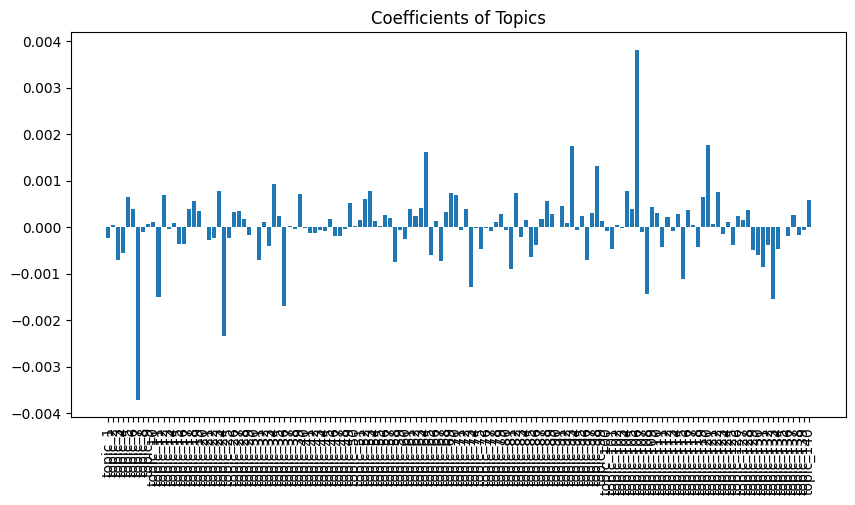

In [43]:
topic_num = topic_distr.shape[1]
topics = np.array(agg_df_sum)
ret = []
for ind in list(agg_df_sum.index):
  ret.append(ind[2])
returns = np.array(ret).reshape(-1,1)
from sklearn.linear_model import LinearRegression
bert_model = LinearRegression(fit_intercept=True)
bert_model.fit(topics,returns)

import matplotlib.pyplot as plt
import statsmodels.api as sm

# Add a constant to the independent variable for the intercept
X = sm.add_constant(topics)
# Fit the regression model
model_sm = sm.OLS(returns, X).fit()
# Print the summary of the regression
print(model_sm.summary())
print("\n")

#plot the coefficients
plt.figure(figsize=(10, 5))
plt.bar(range(len(bert_model.coef_[0])), bert_model.coef_[0])
plt.xticks(range(len(bert_model.coef_[0])), ["topic_" + str(i + 1) for i in range(topic_num)], rotation=90)
plt.title("Coefficients of Topics")
plt.show()



In [44]:
bert_model.score(topics,returns)

0.0028153578074916474